# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from collections import Counter 
# Import API key
from api_keys import weather_api_key
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Runs ** HOLD **

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

## Runs ** HOLD **  edit print list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [34]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "&appid=" + weather_api_key
city_key = "&q=" 
units = "&units=imperial"

query_url = (f'{url}&appid={weather_api_key}{units}&q=')

city_list = []
lat_list = []
temp_list = []
temp_max_list = []
clouds_list = []
humidity_list = []
wind_speed_list = []
date_time_list = []
counter = 0


for city in cities:
    response = requests.get(query_url + city).json()
    counter = counter + 1
    try:
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        temp_list.append(response['main']['temp'])
        temp_max_list.append(response['main']['temp_max'])
        clouds_list.append(response['clouds']['all'])
        humidity_list.append(response['main']['humidity'])
        wind_speed_list.append(response['wind']['speed'])  
        date_time_list.append(response['dt'])
                                                      
        print(str(counter) + ' - ' +  city + " has been processed!")
        time.sleep(2)
    except:            
        print(city + " data not found")
        
        
    
    

nizhneyansk data not found
2 - bredasdorp has been processed!
3 - san patricio has been processed!
4 - bambous virieux has been processed!
5 - banda aceh has been processed!
6 - tiksi has been processed!
7 - gat has been processed!
8 - hobart has been processed!
9 - severo-kurilsk has been processed!
10 - busselton has been processed!
busselton data not found
11 - diffa has been processed!
belushya guba data not found
13 - ushuaia has been processed!
14 - shuyskoye has been processed!
15 - atuona has been processed!
16 - albany has been processed!
17 - howard springs has been processed!
18 - suure-jaani has been processed!
sumbawa data not found
20 - eenhana has been processed!
21 - rikitea has been processed!
22 - tashtagol has been processed!
23 - guerrero negro has been processed!
tsienyane data not found
25 - goderich has been processed!
26 - jamestown has been processed!
27 - ono has been processed!
28 - vestmannaeyjar has been processed!
29 - saint-augustin has been processed!
30

241 - moberly has been processed!
242 - monchegorsk has been processed!
243 - marawi has been processed!
244 - laela has been processed!
245 - hamilton has been processed!
246 - maningrida has been processed!
247 - kloulklubed has been processed!
248 - georgetown has been processed!
249 - port hardy has been processed!
250 - tura has been processed!
tsihombe data not found
252 - katherine has been processed!
253 - waingapu has been processed!
254 - sibolga has been processed!
255 - carnarvon has been processed!
256 - antofagasta has been processed!
257 - east london has been processed!
258 - mahebourg has been processed!
259 - kodiak has been processed!
260 - mayo has been processed!
261 - shubarkuduk has been processed!
262 - isilkul has been processed!
263 - avera has been processed!
264 - benguela has been processed!
265 - dandong has been processed!
266 - dingle has been processed!
warqla data not found
268 - calama has been processed!
269 - bataipora has been processed!
270 - mana

481 - deputatskiy has been processed!
482 - zhangye has been processed!
483 - acari has been processed!
484 - progreso has been processed!
485 - tokur has been processed!
486 - lahad datu has been processed!
487 - namtsy has been processed!
488 - sao miguel do araguaia has been processed!
489 - ahuimanu has been processed!
490 - zhigansk has been processed!
491 - caravelas has been processed!
492 - nyurba has been processed!
493 - tondano has been processed!
494 - gravdal has been processed!
mrirt data not found
496 - simcoe has been processed!
497 - karasburg has been processed!
498 - presidencia roque saenz pena has been processed!
499 - merauke has been processed!
kuche data not found
501 - nushki has been processed!
502 - mangochi has been processed!
503 - waddan has been processed!
504 - manutuke has been processed!
505 - bitung has been processed!
506 - kysyl-syr has been processed!
507 - norrtalje has been processed!
508 - the pas has been processed!
509 - chaumont has been proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Runs ** HOLD **

In [35]:
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Latitude": lat_list,
    "Temperature": temp_list,
    "Max Temperature": temp_max_list,
    "Cloudiness": clouds_list,
    "Humidity": humidity_list,
    "Wind Speed": wind_speed_list,
    "Date/Time": date_time_list
})

city_weather_df

,City,Latitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed,Date/Time
0,Bredasdorp,-34.5322,68.14,68.14,90,74,3.94,1611953196
1,San Patricio,28.0170,72.10,73.99,75,49,14.97,1611953218
2,Bambous Virieux,-20.3428,80.31,80.60,75,78,11.50,1611953220
3,Banda Aceh,5.5577,77.92,77.92,70,81,13.04,1611953223
4,Tiksi,71.6872,-32.19,-32.19,100,84,4.27,1611953225
...,...,...,...,...,...,...,...,...
584,Alexandria,31.2156,55.40,55.40,40,67,9.22,1611954484
585,Vanimo,-2.6741,78.24,78.24,100,82,9.17,1611954487
586,Huangnihe,43.5583,-5.75,-5.75,96,91,1.10,1611954489
587,Udachny,66.4167,-36.92,-36.92,69,80,4.23,1611954491


In [36]:
city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=True)

In [37]:
hum_list = city_weather_df["Humidity"]

for humidity in hum_list:
    if humidity > 100:
        print(humidity)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#  Get the indices of cities that have humidity over 100%.


In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Temperature (F)')

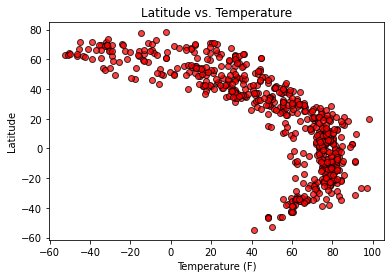

In [52]:
y_axis = lat_list
x_axis = temp_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Temperature')
plt.ylabel('Latitude')
plt.xlabel('Temperature (F)')


## Latitude vs. Humidity Plot

Text(0.5, 0, 'Humidity')

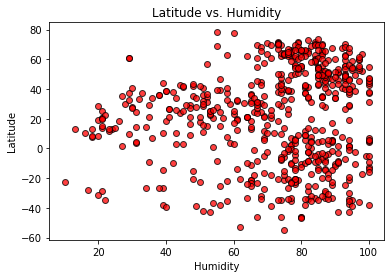

In [45]:
y_axis = lat_list
x_axis = humidity_list


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Humidity')
plt.ylabel('Latitude')
plt.xlabel('Humidity')

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Cloudiness')

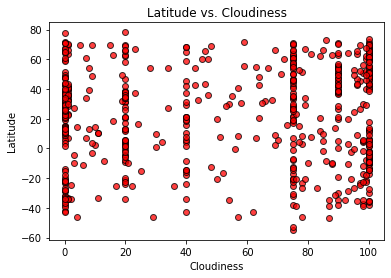

In [46]:
y_axis = lat_list
x_axis = clouds_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Cloudiness')
plt.ylabel('Latitude')
plt.xlabel('Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Wind Speed (mph)')

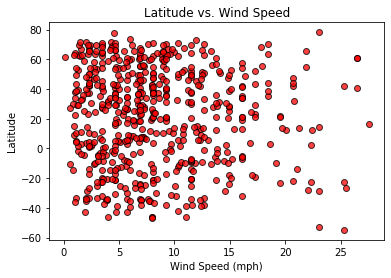

In [48]:
y_axis = lat_list
x_axis = wind_speed_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Wind Speed')
plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')

## Linear Regression

In [72]:
#list comprehension to find north and south latitudes
north_lats = [n_lat for n_lat in lat_list if n_lat >= 0]
south_lats = [lat for lat in lat_list if lat < 0]


In [74]:
north_hem_df = pd.DataFrame({
    "Latitude": north_lats
})

south_hem_df = pd.DataFrame({
    "Latitude": south_lats
})

merged_north_hem_df = pd.merge(north_hem_df, city_weather_df, how="left", on=["Latitude"])
merged_north_hem_df.reset_index

merged_south_hem_df = pd.merge(south_hem_df, city_weather_df, how="left", on=["Latitude"])
merged_south_hem_df.reset_index

    


,Latitude,City,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed,Date/Time
0,-34.5322,Bredasdorp,68.14,68.14,90,74,3.94,1611953196
1,-20.3428,Bambous Virieux,80.31,80.60,75,78,11.50,1611953220
2,-42.8794,Hobart,60.37,62.01,40,94,5.75,1611953153
3,-33.6500,Busselton,59.81,61.00,0,84,3.00,1611953233
4,-54.8000,Ushuaia,41.00,41.00,75,75,25.32,1611953223
...,...,...,...,...,...,...,...,...
161,-9.1061,Atambua,74.59,74.59,100,91,5.91,1611954456
162,-20.3183,Guaíra,82.51,82.51,79,62,4.38,1611954463
163,-14.7889,Ilhéus,82.40,82.40,40,78,4.61,1611954345
164,-5.2900,Presidente Dutra,79.48,79.48,100,84,3.15,1611954482


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

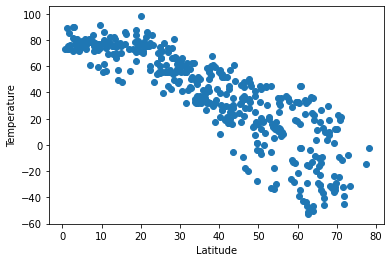

In [88]:
x_values = merged_north_hem_df['Latitude']
y_values = merged_north_hem_df['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)





In [89]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.48x +94.0


The r-value is: 0.7338350731053982


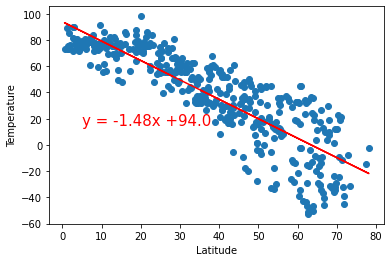

In [92]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(5,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression